In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
N_SAMPLE_LIST = [24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]

In [5]:
mlde_all = pd.read_csv("results/mlde/all_df_comb_onehot.csv")
de_all = pd.read_csv("results/de/DE-active/scale2max/all_landscape_de_summary.csv")

In [16]:
mlde_all.columns

Index(['encoding', 'model', 'n_sample', 'ft_lib', 'rep', 'all_maxes',
       'all_means', 'top_maxes', 'top_means', 'ndcgs', 'rhos', 'if_truemaxs',
       'truemax_inds', 'n_mut_cutoff', 'lib', 'zs', 'n_top', 'scale_fit'],
      dtype='object')

In [29]:
avg_mlde = mlde_all[
    (mlde_all["zs"] == "none")
    & (mlde_all["n_top"] == 96)
    & (mlde_all["n_mut_cutoff"] == "all")
][["n_sample", "top_maxes", "if_truemaxs"]].groupby("n_sample").agg(["mean", "std"]).reset_index()
avg_mlde.columns = ['{}_{}'.format(i, j) for i, j in avg_mlde.columns]
avg_mlde = avg_mlde.rename(columns={'n_sample_': 'n_sample'})
avg_mlde

,n_sample,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
0,24,0.482933,0.375691,0.089286,0.285258
1,48,0.547164,0.379115,0.147857,0.355085
2,96,0.637738,0.371056,0.247857,0.431923
3,192,0.701023,0.358166,0.335000,0.472159
4,288,0.737540,0.343149,0.392857,0.488560
5,384,0.747245,0.340636,0.409286,0.491790
6,480,0.779634,0.323146,0.459286,0.498518
7,576,0.795640,0.312706,0.483571,0.499909
8,960,0.842118,0.279887,0.572857,0.494840
9,1920,0.867727,0.257865,0.614286,0.486938


In [41]:
de_avg = de_all[["de_type", "mean_all"]].groupby("de_type").agg(["mean", "std"])
de_avg.columns = ['{}_{}'.format(i, j) for i, j in de_avg.columns]
de_avg = de_avg.rename(columns={'de_type_': 'de_type'})
de_avg

,mean_all_mean,mean_all_std
de_type,,
recomb_SSM,0.564960,0.242831
single_step_DE,0.612200,0.246041
top96_SSM,0.675433,0.266928


In [55]:
from SSMuLA.de_simulations import DE_COLORS, DE_TYPES, DE_LEGEND_MAP
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE

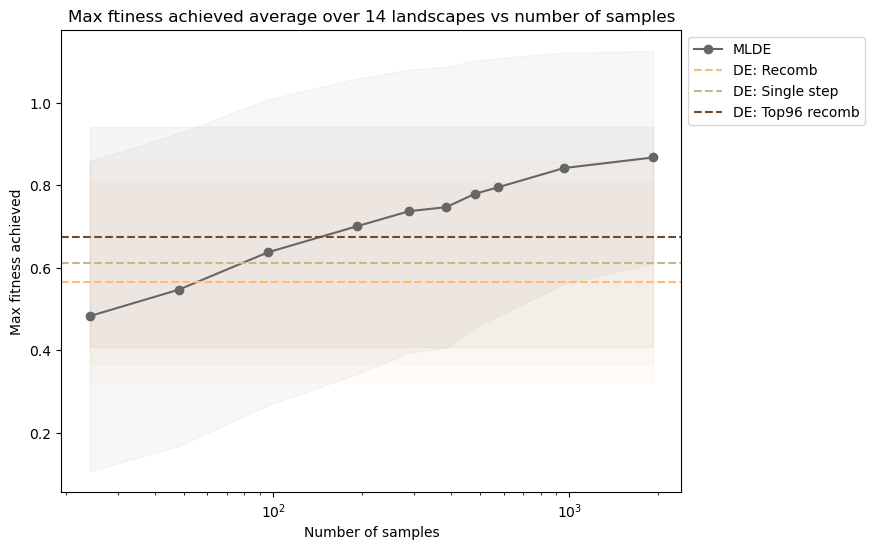

In [57]:
# for avg cross number of samples

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(
    avg_mlde["n_sample"],
    avg_mlde["top_maxes_mean"],
    label="MLDE",
    marker="o",
    linestyle="solid",
    color=PRESENTATION_PALETTE_SATURATE["gray"],
)
ax.fill_between(
    avg_mlde["n_sample"],
    avg_mlde["top_maxes_mean"] - avg_mlde["top_maxes_std"],
    avg_mlde["top_maxes_mean"] + avg_mlde["top_maxes_std"],
    color=PRESENTATION_PALETTE_SATURATE["gray"],
    alpha=0.05,
)

# ax2 = ax.twinx()
# ax2.plot(avg_mlde["n_sample"], avg_mlde["if_truemaxs_mean"], label="If true maxes", linestyle="dotted", marker="*", color=PRESENTATION_PALETTE_SATURATE["green"])
# ax2.fill_between(avg_mlde["n_sample"], avg_mlde["if_truemaxs_mean"] - avg_mlde["if_truemaxs_std"], avg_mlde["if_truemaxs_mean"] + avg_mlde["if_truemaxs_std"], color=PRESENTATION_PALETTE_SATURATE["green"], alpha=0.05)

for de in DE_TYPES:
    ax.axhline(
        de_avg.loc[de, "mean_all_mean"],
        label=f"DE: {DE_LEGEND_MAP[de]}",
        color=DE_COLORS[de],
        linestyle="dashed",
    )
    ax.fill_between(
        avg_mlde["n_sample"],
        de_avg.loc[de, "mean_all_mean"] - de_avg.loc[de, "mean_all_std"],
        de_avg.loc[de, "mean_all_mean"] + de_avg.loc[de, "mean_all_std"],
        color=DE_COLORS[de],
        alpha=0.05,
    )

ax.set_xscale("log")
ax.set_xlabel("Number of samples")
ax.set_ylabel("Max fitness achieved")
ax.set_title("Max ftiness achieved average over 14 landscapes vs number of samples")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

In [ ]:
# count number of mlde > de